# Step 01 :- Data Collection

In [ ]:
!pip install statsmodels

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df = pd.read_csv('financial_data_2.csv')

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width',None)

In [ ]:
df.head(10)

In [ ]:
df.tail(10)

In [ ]:
df['City_Tier'].head(20)

In [ ]:
df['Dependents'].head(20)

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.dtypes

# Step 02:- Cleaning Dataset

In [ ]:
df.isnull().sum()

In [ ]:
df.duplicated().sum()

In [ ]:
import pandas as pd

# Step 1: Fill missing values
# ➤ For categorical-like columns
df['Occupation'] = df['Occupation'].fillna('Unknown')

# ➤ For numerical discrete (rounded values)
df['Age'] = df['Age'].fillna(df['Age'].median()).astype(int)
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].median()).astype(int)
df['City_Tier'] = df['City_Tier'].fillna(df['City_Tier'].mode()[0]).astype(int)

# ➤ For all remaining continuous numeric columns
continuous_cols = df.select_dtypes(include=['float64']).columns.difference(['Age', 'Dependents', 'City_Tier'])
for col in continuous_cols:
    df[col] = df[col].fillna(df[col].median())

# Step 2: Optional — drop columns with high multicollinearity (optional but recommended)
cols_to_drop = ['Disposable_Income', 'Healthcare', 'Entertainment', 'Miscellaneous', 'Education', 'Eating_Out']
df.drop(columns=cols_to_drop, inplace=True)

# Step 3: Optional — create Total_Expenses if you want a summary column
expense_cols = ['Rent', 'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Utilities']
df['Total_Expenses'] = df[expense_cols].sum(axis=1)

# Step 4: Final check
print("✅ Dataset cleaned successfully!")
print("Shape after cleaning:", df.shape)
print("Remaining missing values:", df.isnull().sum().sum())


In [ ]:
df.columns

In [ ]:
df.isnull().sum()

In [ ]:
df.duplicated().sum()

In [ ]:
df.shape

In [ ]:
df.dtypes

In [108]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Step 1: Select only numeric features
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Step 2: Drop rows with missing values for VIF calculation
numeric_df_clean = numeric_df.dropna()

# Step 3: Add constant for intercept
X = add_constant(numeric_df_clean)

# Step 4: Calculate VIF
vif_data = []
for i in range(X.shape[1]):
    try:
        vif = variance_inflation_factor(X.values, i)
    except:
        vif = np.inf
    vif_data.append(vif)

# Step 5: Create and display the VIF DataFrame
vif_df = pd.DataFrame({
    'Feature': X.columns,
    'VIF': vif_data
}).sort_values(by='VIF', ascending=False)

# Step 6: Optional - Replace inf with ∞ symbol for readability
vif_df['VIF'] = vif_df['VIF'].replace(np.inf, '∞')

# Display result
print(vif_df)


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                            Feature         VIF
5                              Rent           ∞
10                        Utilities           ∞
9                         Transport           ∞
8                         Groceries           ∞
7                         Insurance           ∞
6                    Loan_Repayment           ∞
21                   Total_Expenses           ∞
0                             const  105.756613
12                  Desired_Savings   10.439885
1                            Income    7.539421
11       Desired_Savings_Percentage    7.106285
14      Potential_Savings_Transport     1.91552
17      Potential_Savings_Utilities    1.815371
13      Potential_Savings_Groceries     1.81281
19      Potential_Savings_Education    1.209066
20  Potential_Savings_Miscellaneous    1.208774
15     Potential_Savings_Eating_Out    1.207238
16  Potential_Savings_Entertainment    1.174434
18     Potential_Savings_Healthcare    1.133666
2                               Age    1

In [109]:
# Correlation matrix (Pearson correlation by default)
correlation_matrix = df.corr(numeric_only=True)

# Display top correlated pairs (absolute values, excluding self-correlations)
corr_pairs = correlation_matrix.abs().unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1]  # Remove self-correlations

# Show top 10 highest correlations
print("Top 10 Highly Correlated Feature Pairs:")
print(corr_pairs.head(10))

Top 10 Highly Correlated Feature Pairs:
Total_Expenses              Income                        0.860674
Income                      Total_Expenses                0.860674
Total_Expenses              Rent                          0.801013
Rent                        Total_Expenses                0.801013
Desired_Savings_Percentage  Desired_Savings               0.764295
Desired_Savings             Desired_Savings_Percentage    0.764295
Loan_Repayment              Total_Expenses                0.729971
Total_Expenses              Loan_Repayment                0.729971
                            Groceries                     0.716328
Groceries                   Total_Expenses                0.716328
dtype: float64


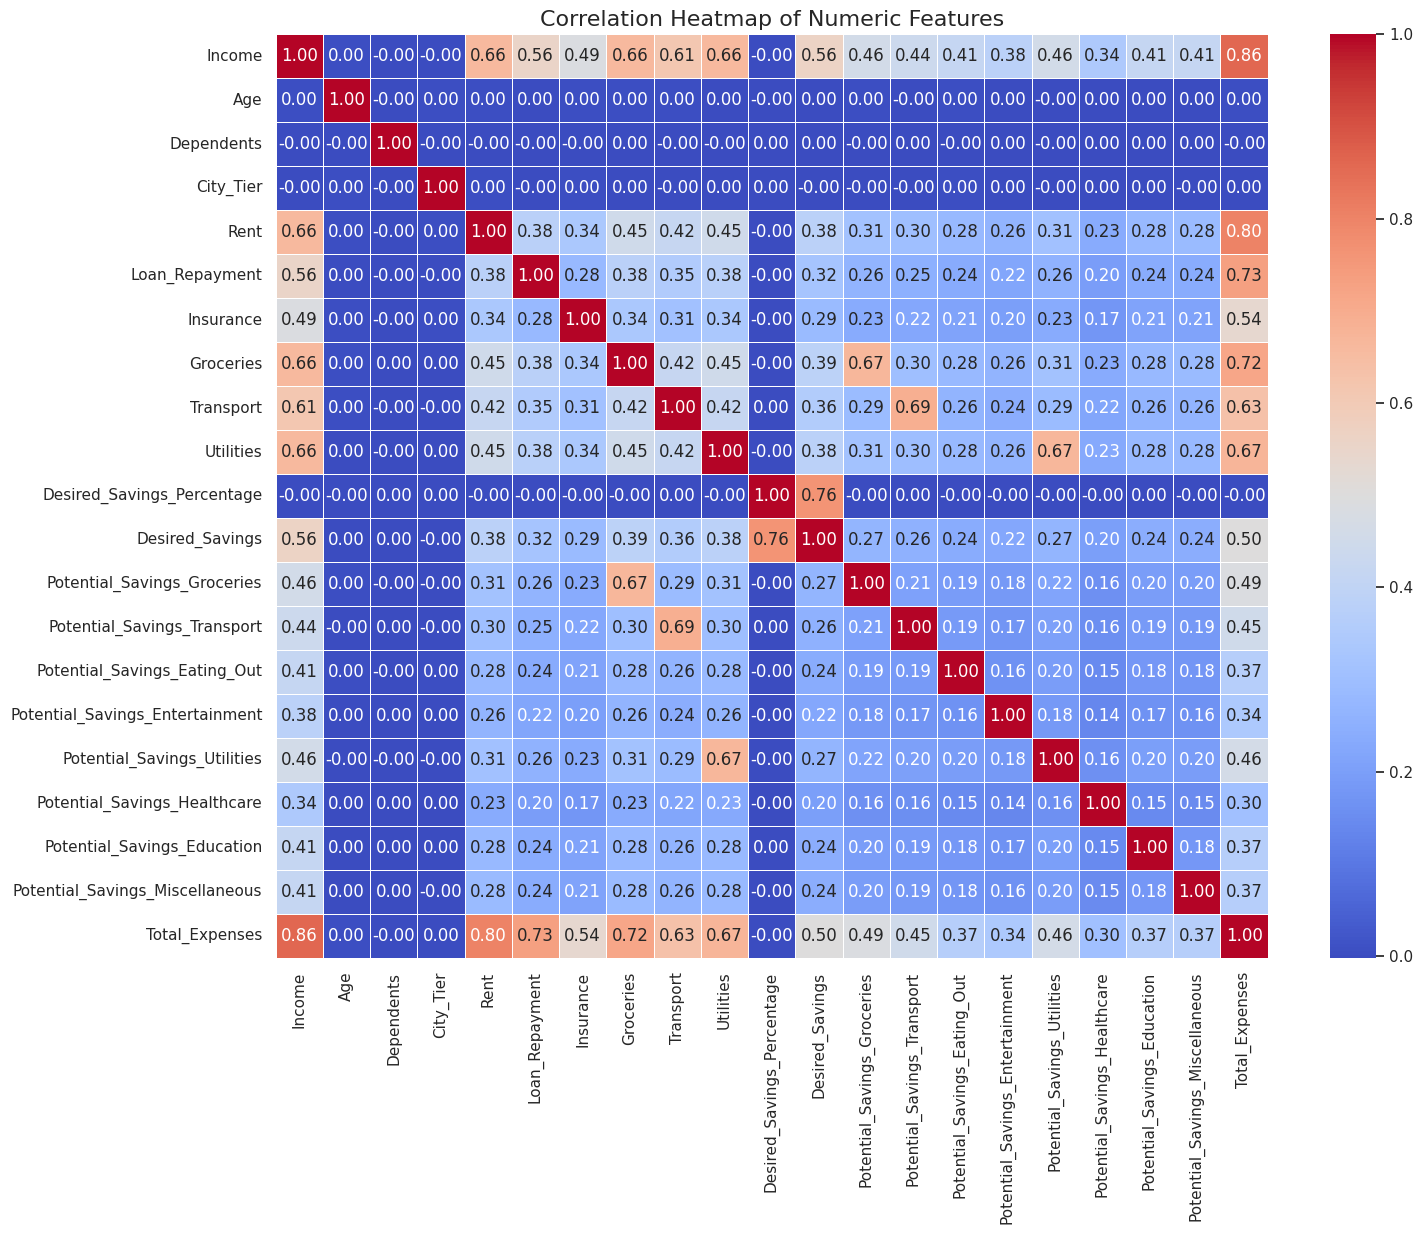

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.show()

In [111]:
# List of columns to drop
cols_to_drop = ['Utilities', 'Rent', 'Loan_Repayment', 'Insurance', 'Transport', 'Groceries']

# Drop them from the dataset
df.drop(columns=cols_to_drop, inplace=True)

# Confirm the result
print("✅ Dropped columns:", cols_to_drop)
print("📦 New shape of dataset:", df.shape)

✅ Dropped columns: ['Utilities', 'Rent', 'Loan_Repayment', 'Insurance', 'Transport', 'Groceries']
📦 New shape of dataset: (500000, 16)


In [112]:
df.shape

(500000, 16)

In [113]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Step 1: Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Step 2: Drop rows with missing values for VIF calculation
numeric_df_clean = numeric_df.dropna()

# Step 3: Add constant column
X = add_constant(numeric_df_clean)

# Step 4: Calculate VIF
vif_data = []
for i in range(X.shape[1]):
    try:
        vif_score = variance_inflation_factor(X.values, i)
    except:
        vif_score = np.inf
    vif_data.append(vif_score)

# Step 5: Create VIF DataFrame
vif_df = pd.DataFrame({
    'Feature': X.columns,
    'VIF': vif_data
}).sort_values(by='VIF', ascending=False)

# Step 6: Optional: Replace inf with readable symbol
vif_df['VIF'] = vif_df['VIF'].replace(np.inf, '∞')

# Show the result
print(vif_df)


                            Feature         VIF
0                             const  105.645282
6                   Desired_Savings   10.426829
1                            Income    7.275712
5        Desired_Savings_Percentage    7.098921
15                   Total_Expenses    4.298367
7       Potential_Savings_Groceries    1.324966
11      Potential_Savings_Utilities    1.293763
8       Potential_Savings_Transport    1.272066
13      Potential_Savings_Education    1.209040
14  Potential_Savings_Miscellaneous    1.208678
9      Potential_Savings_Eating_Out    1.207091
10  Potential_Savings_Entertainment    1.174291
12     Potential_Savings_Healthcare    1.133586
2                               Age    1.000046
4                         City_Tier    1.000031
3                        Dependents    1.000011


In [114]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Step 1: Select numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Step 2: Drop missing values (VIF needs complete data)
numeric_df_clean = numeric_df.dropna()

# Step 3: Add constant for intercept
X = add_constant(numeric_df_clean)

# Step 4: Calculate VIF for each column
vif_data = []
for i in range(X.shape[1]):
    try:
        vif_score = variance_inflation_factor(X.values, i)
    except:
        vif_score = np.inf
    vif_data.append(vif_score)

# Step 5: Store VIF values in a DataFrame
vif_df = pd.DataFrame({
    "Feature": X.columns,
    "VIF": vif_data
})

# Step 6: Filter out features with VIF > 10, excluding the constant
high_vif_features = vif_df[(vif_df['VIF'] > 10) & (vif_df['Feature'] != 'const')]['Feature'].tolist()

print("🔴 Dropping high VIF features:", high_vif_features)

# Step 7: Drop from original df (only if they exist)
df.drop(columns=high_vif_features, inplace=True)

# Step 8: Show updated DataFrame info
print("✅ Columns dropped. Updated shape of df:", df.shape)


🔴 Dropping high VIF features: ['Desired_Savings']
✅ Columns dropped. Updated shape of df: (500000, 15)


In [115]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Step 1: Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Step 2: Drop rows with missing values for VIF calculation
numeric_df_clean = numeric_df.dropna()

# Step 3: Add constant column
X = add_constant(numeric_df_clean)

# Step 4: Calculate VIF
vif_data = []
for i in range(X.shape[1]):
    try:
        vif_score = variance_inflation_factor(X.values, i)
    except:
        vif_score = np.inf
    vif_data.append(vif_score)

# Step 5: Create VIF DataFrame
vif_df = pd.DataFrame({
    'Feature': X.columns,
    'VIF': vif_data
}).sort_values(by='VIF', ascending=False)

# Step 6: Optional: Replace inf with readable symbol
vif_df['VIF'] = vif_df['VIF'].replace(np.inf, '∞')

# Show the result
print(vif_df)


                            Feature        VIF
0                             const  49.508765
1                            Income   4.734682
14                   Total_Expenses   4.264064
6       Potential_Savings_Groceries   1.324791
10      Potential_Savings_Utilities   1.293385
7       Potential_Savings_Transport   1.271897
12      Potential_Savings_Education   1.208524
13  Potential_Savings_Miscellaneous   1.207899
8      Potential_Savings_Eating_Out   1.206389
9   Potential_Savings_Entertainment   1.173620
11     Potential_Savings_Healthcare   1.133200
2                               Age   1.000046
4                         City_Tier   1.000028
5        Desired_Savings_Percentage   1.000014
3                        Dependents   1.000011


In [116]:
df.head()

Income  Age  Dependents Occupation  City_Tier  \
0  55960.569836   46           1   Business          1   
1  48340.828386   21           1   Salaried          1   
2  57772.262457   25           0   Salaried          2   
3  68276.358277   55           0   Salaried          1   
4  47190.159503   48           1   Salaried          1   

   Desired_Savings_Percentage  Potential_Savings_Groceries  \
0                    0.188454                  1278.635947   
1                    0.083077                   317.751545   
2                    0.181458                   909.169324   
3                    0.069227                   772.340602   
4                    0.178170                   720.856550   

   Potential_Savings_Transport  Potential_Savings_Eating_Out  \
0                   306.490082                    150.188151   
1                   189.509425                    391.868349   
2                   448.337949                    270.973509   
3                   394.992984                    557.188560   
4                   689.550082                    330.012373   

   Potential_Savings_Entertainment  Potential_Savings_Utilities  \
0                       493.636673                   120.426749   
1                       189.860863                   486.525435   
2                       455.452601                   301.928774   
3                       584.194632                  1035.830627   
4                       116.536741                   393.672727   

   Potential_Savings_Healthcare  Potential_Savings_Education  \
0                    584.853554                   252.221591   
1                    304.888699                   288.870728   
2                    293.257586                    97.788042   
3                    609.494826                   166.961144   
4                    109.262528                   288.255678   

   Potential_Savings_Miscellaneous  Total_Expenses  
0                       115.618650    33417.790602  
1                       275.758668    34916.376421  
2                        95.327148    35726.036579  
3                       164.061120    40503.979848  
4                        53.677966    32799.478325

In [117]:
df = df.round(3)

In [118]:
df.head()

Income  Age  Dependents Occupation  City_Tier  \
0  55960.570   46           1   Business          1   
1  48340.828   21           1   Salaried          1   
2  57772.262   25           0   Salaried          2   
3  68276.358   55           0   Salaried          1   
4  47190.160   48           1   Salaried          1   

   Desired_Savings_Percentage  Potential_Savings_Groceries  \
0                       0.188                     1278.636   
1                       0.083                      317.752   
2                       0.181                      909.169   
3                       0.069                      772.341   
4                       0.178                      720.857   

   Potential_Savings_Transport  Potential_Savings_Eating_Out  \
0                      306.490                       150.188   
1                      189.509                       391.868   
2                      448.338                       270.974   
3                      394.993                       557.189   
4                      689.550                       330.012   

   Potential_Savings_Entertainment  Potential_Savings_Utilities  \
0                          493.637                      120.427   
1                          189.861                      486.525   
2                          455.453                      301.929   
3                          584.195                     1035.831   
4                          116.537                      393.673   

   Potential_Savings_Healthcare  Potential_Savings_Education  \
0                       584.854                      252.222   
1                       304.889                      288.871   
2                       293.258                       97.788   
3                       609.495                      166.961   
4                       109.263                      288.256   

   Potential_Savings_Miscellaneous  Total_Expenses  
0                          115.619       33417.791  
1                          275.759       34916.376  
2                           95.327       35726.037  
3                          164.061       40503.980  
4                           53.678       32799.478

 ## Find Highly Correlated Pairs (> 0.8 or < -0.8)

In [119]:
high_corr = correlation_matrix.abs().unstack().sort_values(ascending=False)
high_corr = high_corr[high_corr < 1]  # Exclude perfect self-correlation
high_corr[high_corr > 0.8]

Total_Expenses  Income            0.860674
Income          Total_Expenses    0.860674
Total_Expenses  Rent              0.801013
Rent            Total_Expenses    0.801013
dtype: float64

In [120]:
df.drop(['Potential_Savings_Healthcare'], axis=1, inplace=True)

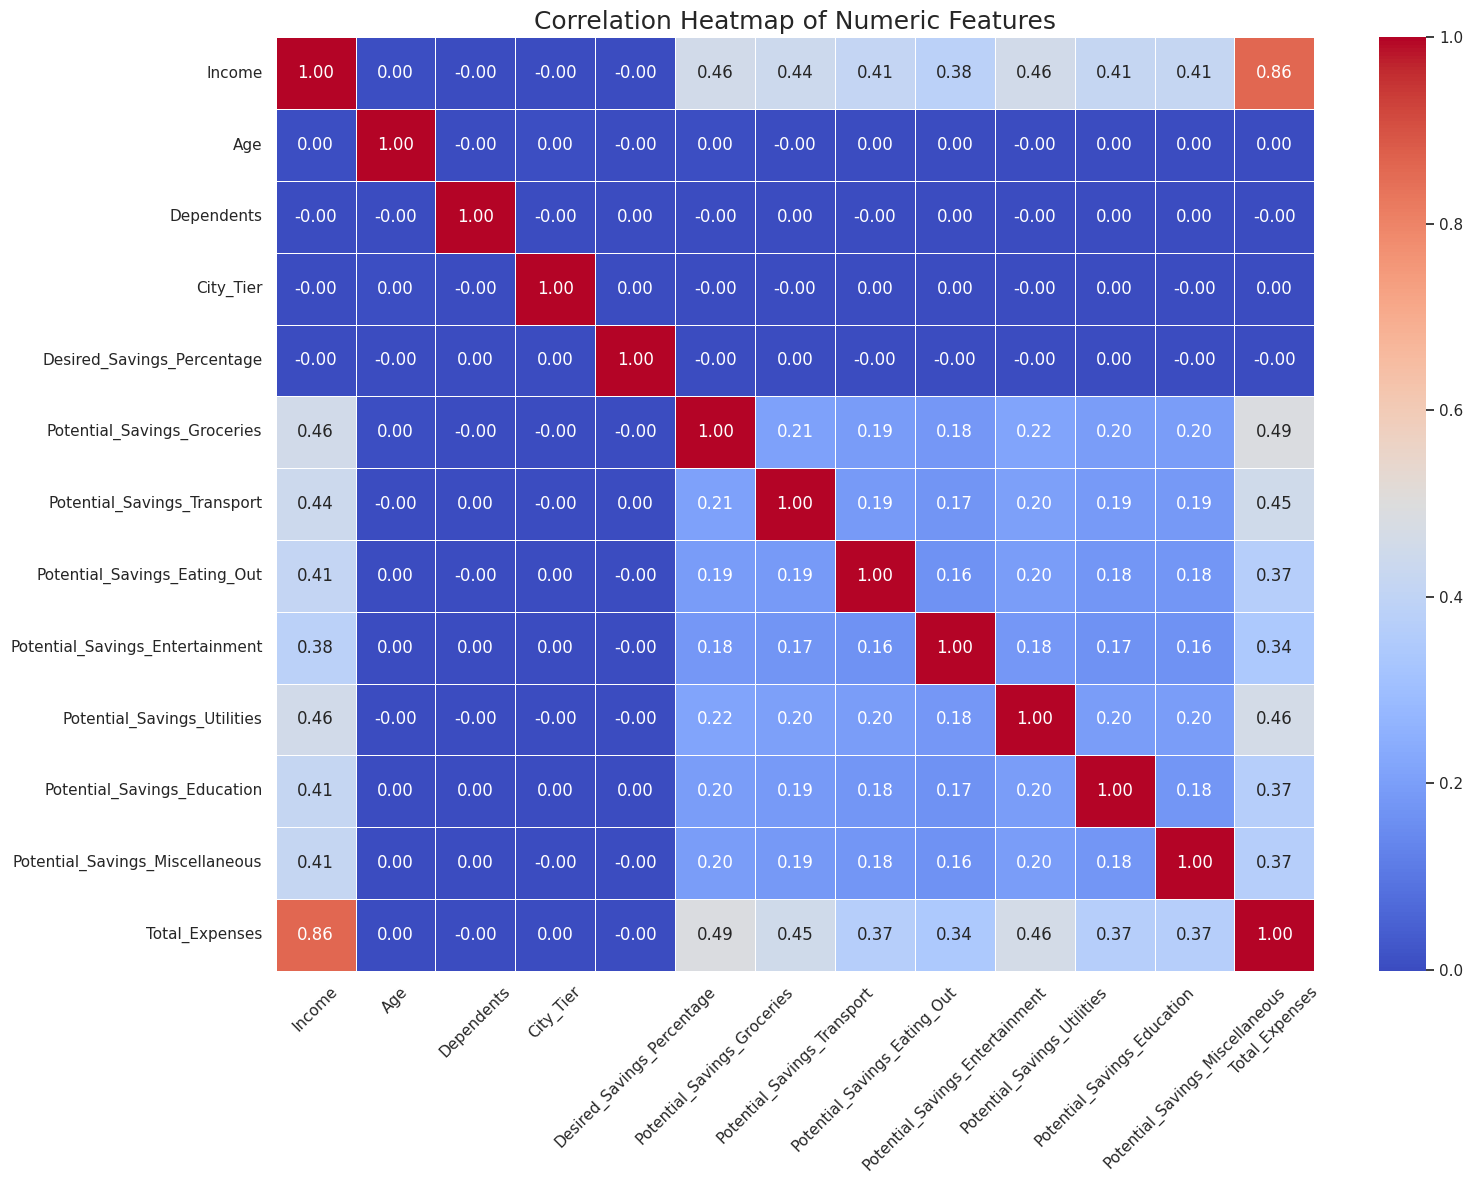

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Compute the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Step 2: Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Step 3: Create heatmap
sns.heatmap(
    corr_matrix,
    annot=True,           # show correlation values
    fmt=".2f",            # format to 2 decimal places
    cmap="coolwarm",      # color palette
    linewidths=0.5,       # lines between cells
    cbar=True             # show color bar
)

# Step 4: Title and display
plt.title("Correlation Heatmap of Numeric Features", fontsize=18)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [122]:
# Step 1: Compute the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Step 2: Unstack and sort the absolute correlation values
corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)

# Step 3: Remove self-correlations (e.g., Age with Age)
filtered_corr = corr_pairs[corr_pairs < 1]

# Step 4: Drop duplicate pairs (A-B and B-A)
filtered_corr = filtered_corr[~filtered_corr.index.duplicated()]

# Step 5: Show top 10 highest correlation pairs
print("🔝 Top 10 Most Correlated Feature Pairs:\n")
top_10 = filtered_corr.head(10)
for (feature1, feature2), corr_value in top_10.items():
    print(f"{feature1} ↔ {feature2} : {corr_value:.2f}")


🔝 Top 10 Most Correlated Feature Pairs:

Income ↔ Total_Expenses : 0.86
Total_Expenses ↔ Income : 0.86
Total_Expenses ↔ Potential_Savings_Groceries : 0.49
Potential_Savings_Groceries ↔ Total_Expenses : 0.49
Potential_Savings_Utilities ↔ Total_Expenses : 0.46
Total_Expenses ↔ Potential_Savings_Utilities : 0.46
Potential_Savings_Utilities ↔ Income : 0.46
Income ↔ Potential_Savings_Utilities : 0.46
Income ↔ Potential_Savings_Groceries : 0.46
Potential_Savings_Groceries ↔ Income : 0.46


# Outliers

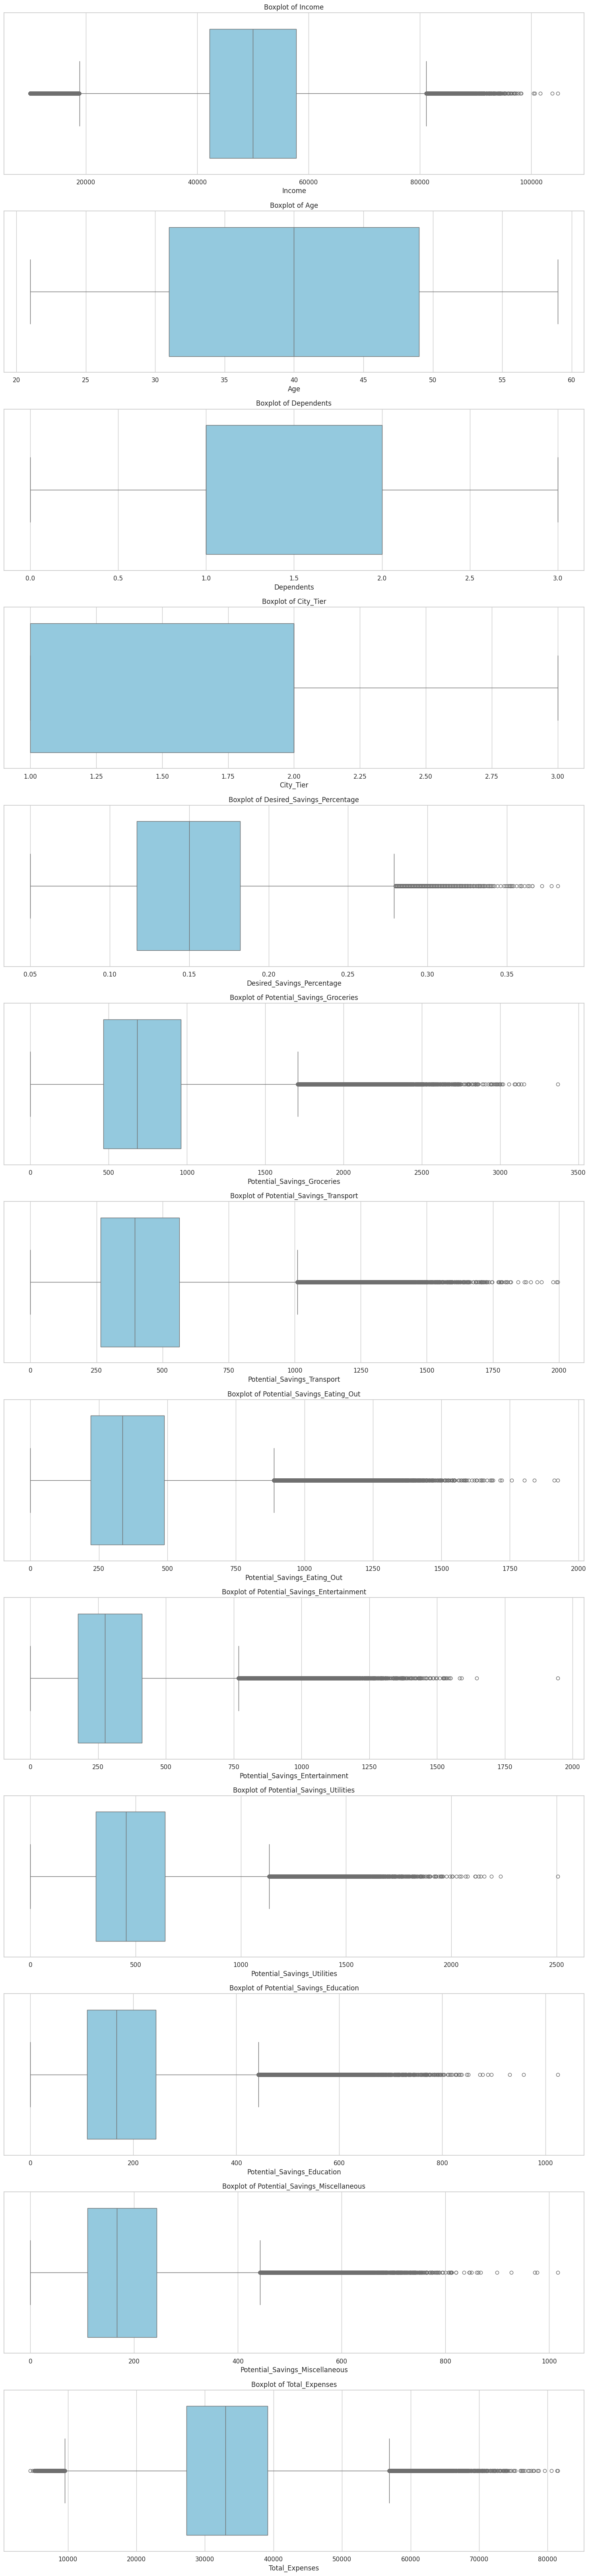

In [123]:
# Set plot style
sns.set(style="whitegrid")

# Loop through all numeric columns and create boxplots
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plotting
plt.figure(figsize=(15, 5 * len(numeric_cols)))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

In [124]:
# Select only numerical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Function to calculate outlier percentage using IQR method
def outlier_percentage(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return round(100 * len(outliers) / len(series), 2)

# Apply function to all numeric columns
outlier_percentages = df[numeric_cols].apply(outlier_percentage)

# Display results
print("Percentage of outliers in each numerical column:")
print(outlier_percentages)

Percentage of outliers in each numerical column:
Income                             0.92
Age                                0.00
Dependents                         0.00
City_Tier                          0.00
Desired_Savings_Percentage         0.46
Potential_Savings_Groceries        1.89
Potential_Savings_Transport        2.11
Potential_Savings_Eating_Out       2.32
Potential_Savings_Entertainment    2.56
Potential_Savings_Utilities        1.89
Potential_Savings_Education        2.31
Potential_Savings_Miscellaneous    2.35
Total_Expenses                     0.99
dtype: float64


In [125]:
# Select numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Loop through each numerical column to find outlier percentage
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Find outliers
    outliers = df[(df[col] < lower) | (df[col] > upper)]

    # Calculate percentage
    percentage = (len(outliers) / len(df)) * 100

    print(f"{col}: {percentage:.2f}% outliers")

Income: 0.92% outliers
Age: 0.00% outliers
Dependents: 0.00% outliers
City_Tier: 0.00% outliers
Desired_Savings_Percentage: 0.46% outliers
Potential_Savings_Groceries: 1.89% outliers
Potential_Savings_Transport: 2.11% outliers
Potential_Savings_Eating_Out: 2.32% outliers
Potential_Savings_Entertainment: 2.56% outliers
Potential_Savings_Utilities: 1.89% outliers
Potential_Savings_Education: 2.31% outliers
Potential_Savings_Miscellaneous: 2.35% outliers
Total_Expenses: 0.99% outliers


In [126]:
# Select only numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Cap outliers using IQR method
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Cap the values
    df[col] = df[col].clip(lower=lower, upper=upper)

# Done: DataFrame `df` now has capped values
print("Outliers have been capped using IQR method.")

Outliers have been capped using IQR method.


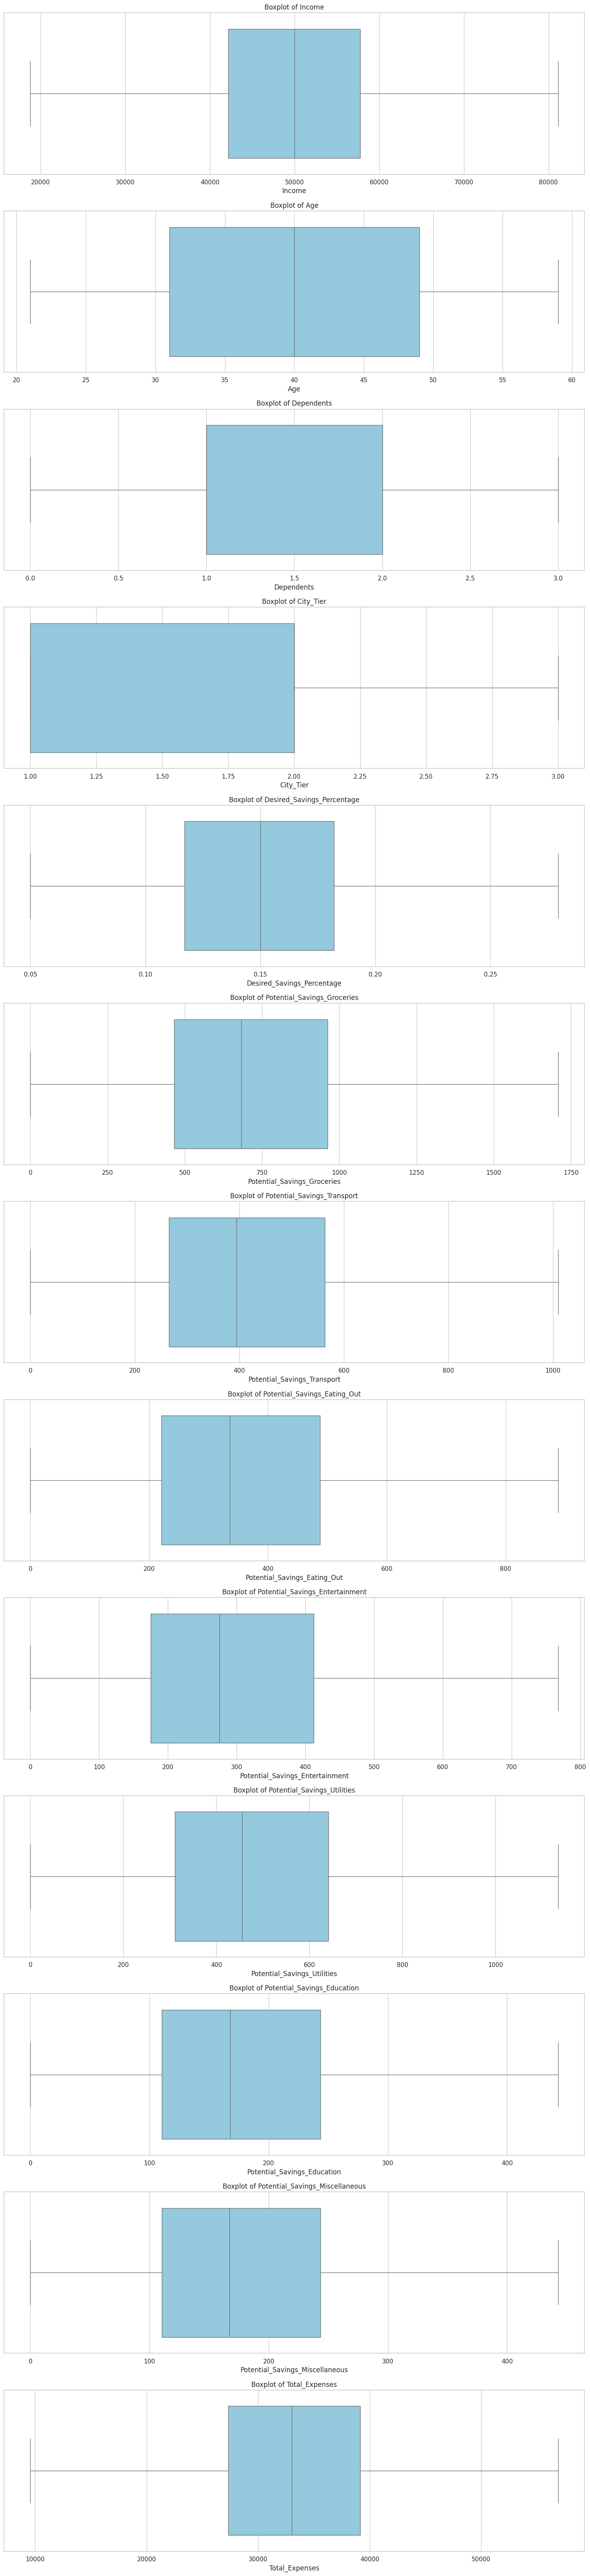

In [127]:
# Set plot style
sns.set(style="whitegrid")

# Loop through all numeric columns and create boxplots
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plotting
plt.figure(figsize=(15, 5 * len(numeric_cols)))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

In [128]:
df.columns

Index(['Income', 'Age', 'Dependents', 'Occupation', 'City_Tier',
       'Desired_Savings_Percentage', 'Potential_Savings_Groceries',
       'Potential_Savings_Transport', 'Potential_Savings_Eating_Out',
       'Potential_Savings_Entertainment', 'Potential_Savings_Utilities',
       'Potential_Savings_Education', 'Potential_Savings_Miscellaneous',
       'Total_Expenses'],
      dtype='object')

In [129]:
df.shape

(500000, 14)

In [130]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Step 1: Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Step 2: Drop rows with missing values (VIF needs complete data)
numeric_df_cleaned = numeric_df.dropna()

# Step 3: Add constant for intercept
X = add_constant(numeric_df_cleaned)

# Step 4: Calculate VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Step 5: Display sorted VIF values
vif.sort_values(by="VIF", ascending=False)


Feature        VIF
0                             const  49.951743
1                            Income   4.631973
13                   Total_Expenses   4.272735
6       Potential_Savings_Groceries   1.321036
10      Potential_Savings_Utilities   1.290693
7       Potential_Savings_Transport   1.269287
11      Potential_Savings_Education   1.206524
12  Potential_Savings_Miscellaneous   1.205790
8      Potential_Savings_Eating_Out   1.204556
9   Potential_Savings_Entertainment   1.171124
2                               Age   1.000043
4                         City_Tier   1.000028
5        Desired_Savings_Percentage   1.000011
3                        Dependents   1.000011

In [131]:
df.head(10)

Income  Age  Dependents Occupation  City_Tier  \
0  55960.570   46           1   Business          1   
1  48340.828   21           1   Salaried          1   
2  57772.262   25           0   Salaried          2   
3  68276.358   55           0   Salaried          1   
4  47190.160   48           1   Salaried          1   
5  49992.572   24           1   Business          2   
6  68950.554   35           0   Business          2   
7  59209.217   28           1   Business          2   
8  44366.307   22           2   Business          2   
9  56510.721   39           1   Business          3   

   Desired_Savings_Percentage  Potential_Savings_Groceries  \
0                       0.188                     1278.636   
1                       0.083                      317.752   
2                       0.181                      909.169   
3                       0.069                      772.341   
4                       0.178                      720.857   
5                       0.199                      601.535   
6                       0.103                      820.197   
7                       0.138                      594.714   
8                       0.144                      682.350   
9                       0.140                      607.509   

   Potential_Savings_Transport  Potential_Savings_Eating_Out  \
0                      306.490                       150.188   
1                      189.509                       391.868   
2                      448.338                       270.974   
3                      394.993                       557.189   
4                      689.550                       330.012   
5                      503.075                       463.926   
6                      966.929                       669.557   
7                      426.302                       344.720   
8                      606.175                       180.518   
9                      127.807                       246.574   

   Potential_Savings_Entertainment  Potential_Savings_Utilities  \
0                          493.637                      120.427   
1                          189.861                      486.525   
2                          455.453                      301.929   
3                          584.195                     1035.831   
4                          116.537                      393.673   
5                          251.229                      544.612   
6                          275.198                      469.536   
7                           93.434                      712.664   
8                          296.744                      265.416   
9                          106.988                      781.014   

   Potential_Savings_Education  Potential_Savings_Miscellaneous  \
0                      252.222                          115.619   
1                      288.871                          275.759   
2                       97.788                           95.327   
3                      166.961                          164.061   
4                      288.256                           53.678   
5                      256.162                          194.573   
6                      203.978                          420.759   
7                      104.423                           61.202   
8                      233.110                          166.992   
9                      184.701                          304.019   

   Total_Expenses  
0       33417.791  
1       34916.376  
2       35726.037  
3       40503.980  
4       32799.478  
5       25594.553  
6       45714.571  
7       43681.524  
8       29419.701  
9       31823.793

In [132]:
df.tail(10)

Income  Age  Dependents  Occupation  City_Tier  \
499990  47314.973   57           0  Freelancer          2   
499991  60171.735   52           2    Business          2   
499992  33308.028   46           1    Business          2   
499993  42248.930   36           1    Business          1   
499994  53705.969   46           1  Freelancer          2   
499995  66003.443   57           0  Freelancer          1   
499996  48682.922   57           1  Freelancer          2   
499997  47075.666   35           2    Business          2   
499998  40430.484   56           3  Freelancer          1   
499999  30306.399   27           1    Salaried          2   

        Desired_Savings_Percentage  Potential_Savings_Groceries  \
499990                       0.079                      668.685   
499991                       0.228                     1114.494   
499992                       0.200                      734.046   
499993                       0.244                      237.929   
499994                       0.105                      412.539   
499995                       0.107                      865.403   
499996                       0.066                      450.848   
499997                       0.192                     1121.291   
499998                       0.192                     1085.759   
499999                       0.121                      434.762   

        Potential_Savings_Transport  Potential_Savings_Eating_Out  \
499990                      140.038                       450.060   
499991                      565.912                       810.282   
499992                      331.513                       125.358   
499993                      258.984                       612.662   
499994                      394.993                       307.948   
499995                      678.257                       228.600   
499996                      184.438                       527.110   
499997                      454.057                       506.739   
499998                      432.785                       348.116   
499999                       89.095                       135.426   

        Potential_Savings_Entertainment  Potential_Savings_Utilities  \
499990                          282.012                     691.0160   
499991                          189.144                    1135.0265   
499992                          317.856                     410.7740   
499993                          211.634                     627.5890   
499994                          380.479                     790.4270   
499995                          644.333                     318.9840   
499996                          176.221                     300.0640   
499997                          275.198                     645.0670   
499998                          362.880                     317.5720   
499999                          168.290                     147.7760   

        Potential_Savings_Education  Potential_Savings_Miscellaneous  \
499990                      183.871                          251.233   
499991                      288.802                          153.534   
499992                      120.372                          143.852   
499993                      180.819                          124.456   
499994                      166.047                          119.570   
499995                      380.485                          237.971   
499996                      196.005                          108.514   
499997                      118.983                          171.763   
499998                      177.193                          238.407   
499999                       70.493                           31.124   

        Total_Expenses  
499990       31613.286  
499991       42098.463  
499992       22741.708  
499993       28803.370  
499994       38195.484  
499995       34479.875  
499996       26144.534  
499997       38593.508  
499998       25609.369  
49999

# Step:03- EDA performaning

In [133]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Define numerical_features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Prepare data for VIF
X = df[numerical_features].dropna()  # Drop missing values
X = add_constant(X)

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display result
print(vif_data)


                            Feature        VIF
0                             const  49.951743
1                            Income   4.631973
2                               Age   1.000043
3                        Dependents   1.000011
4                         City_Tier   1.000028
5        Desired_Savings_Percentage   1.000011
6       Potential_Savings_Groceries   1.321036
7       Potential_Savings_Transport   1.269287
8      Potential_Savings_Eating_Out   1.204556
9   Potential_Savings_Entertainment   1.171124
10      Potential_Savings_Utilities   1.290693
11      Potential_Savings_Education   1.206524
12  Potential_Savings_Miscellaneous   1.205790
13                   Total_Expenses   4.272735


In [134]:
print("📊 Basic Info:")
print(df.info())

print("\n🔍 Missing Values:")
print(df.isnull().sum())

print("\n📐 Summary Statistics:")
print(df.describe())

📊 Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 14 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Income                           500000 non-null  float64
 1   Age                              500000 non-null  int64  
 2   Dependents                       500000 non-null  int64  
 3   Occupation                       500000 non-null  object 
 4   City_Tier                        500000 non-null  int64  
 5   Desired_Savings_Percentage       500000 non-null  float64
 6   Potential_Savings_Groceries      500000 non-null  float64
 7   Potential_Savings_Transport      500000 non-null  float64
 8   Potential_Savings_Eating_Out     500000 non-null  float64
 9   Potential_Savings_Entertainment  500000 non-null  float64
 10  Potential_Savings_Utilities      500000 non-null  float64
 11  Potential_Savings_Education      500000 non-null  f

# UNIVARIATE ANALYSIS(Feature Distributions)

## Numerical Columns

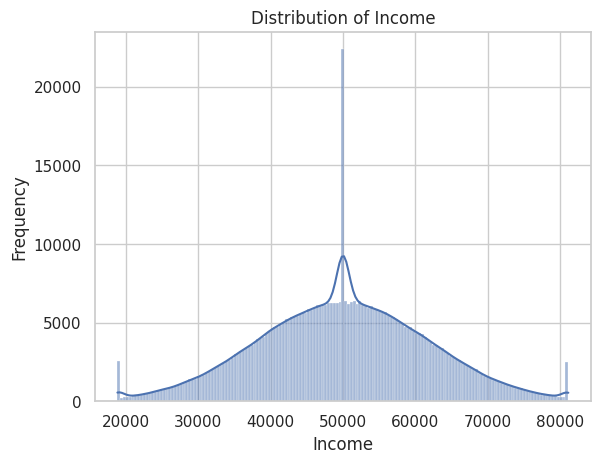

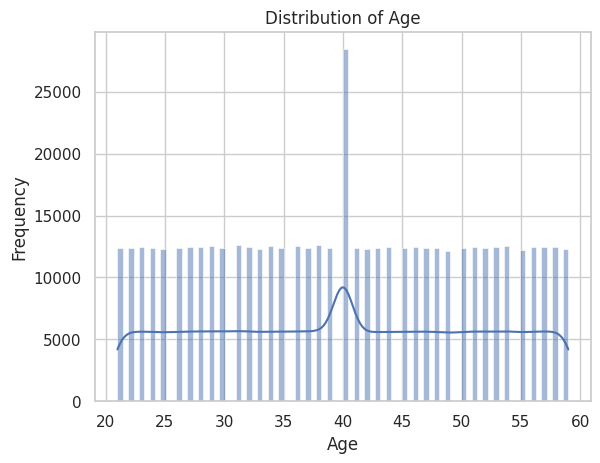

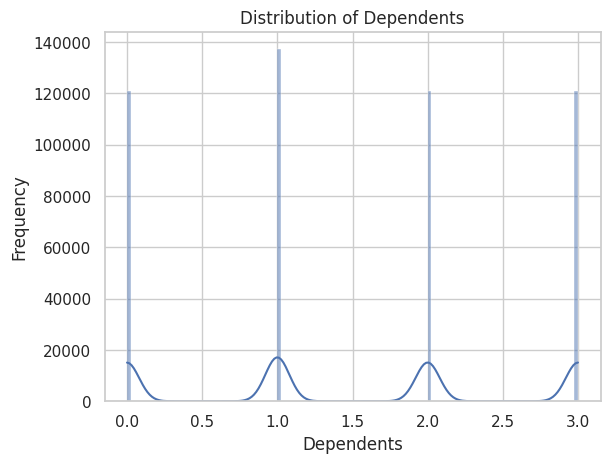

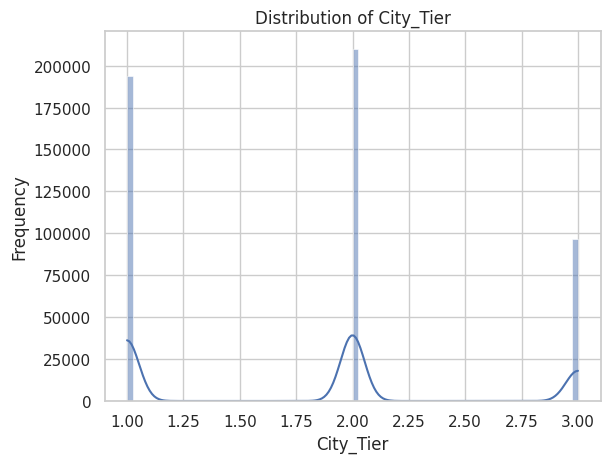

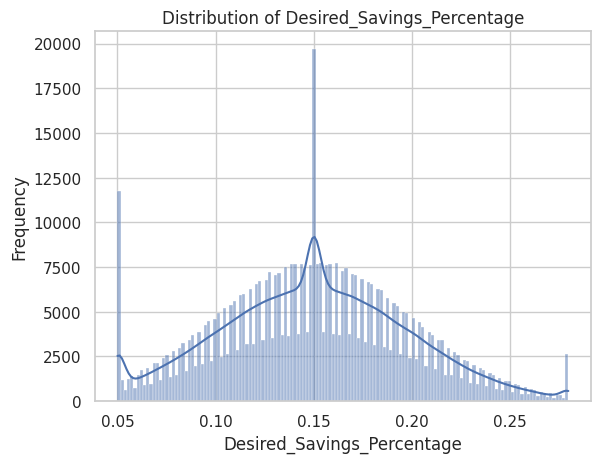

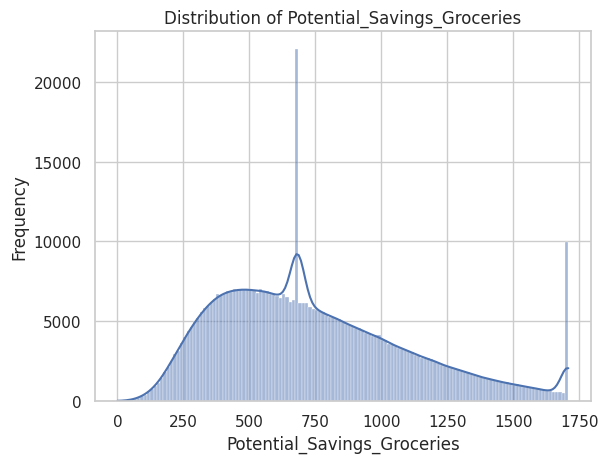

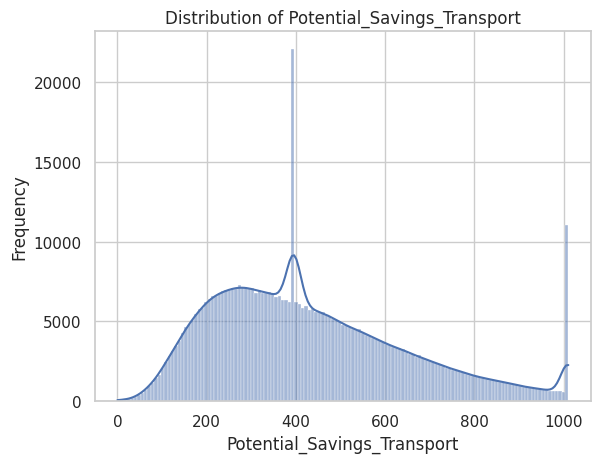

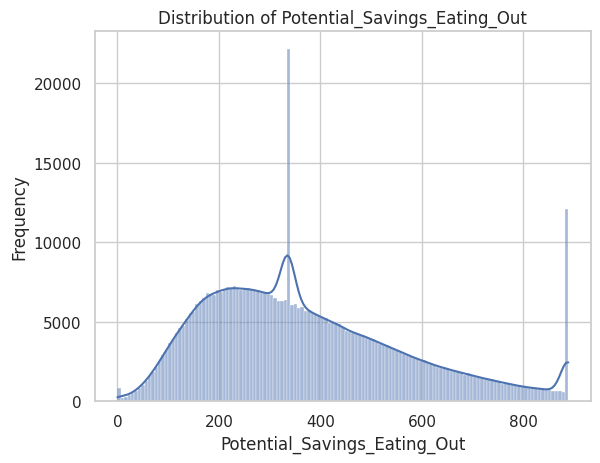

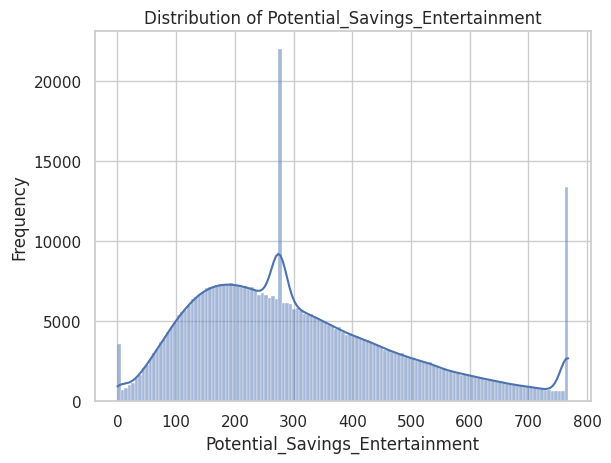

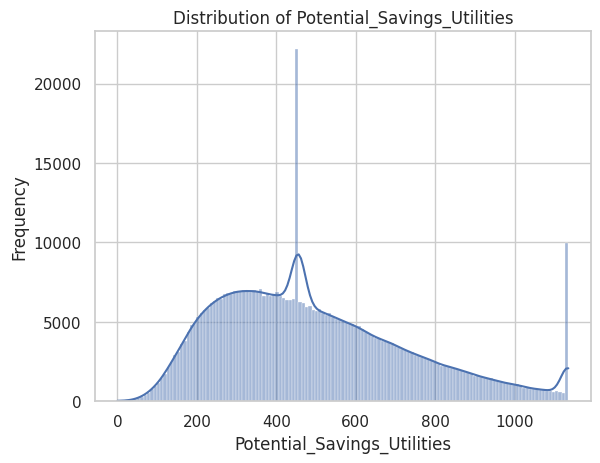

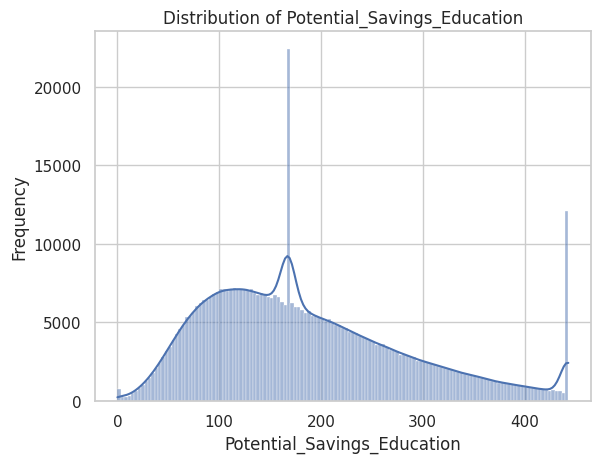

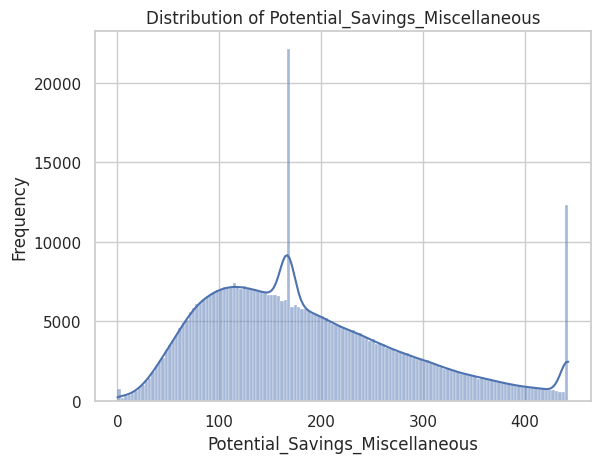

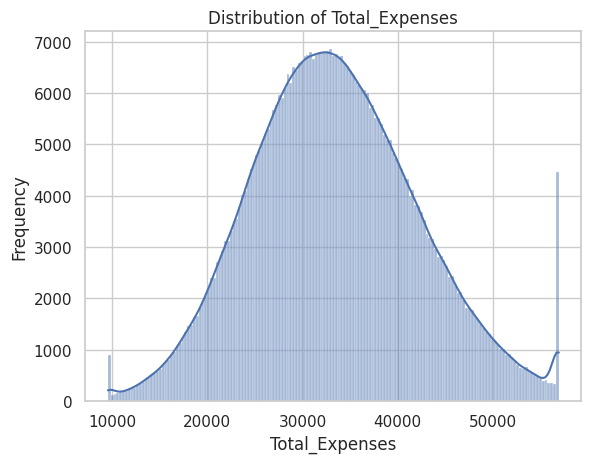

In [135]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

## Categorical Columns

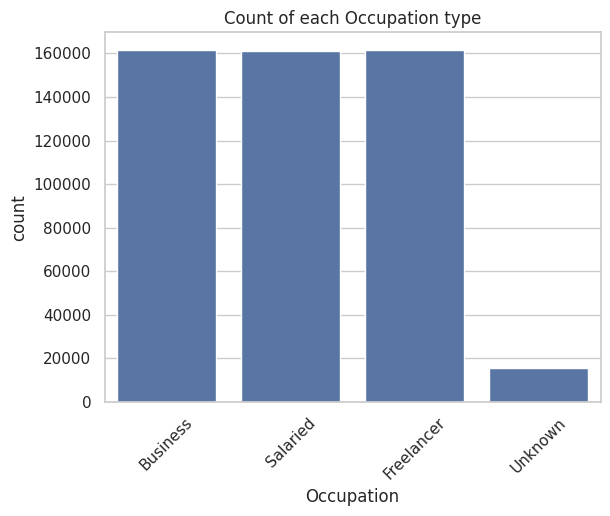

In [136]:
# If 'Occupation' is your only categorical column
plt.figure()
sns.countplot(x='Occupation', data=df)
plt.title("Count of each Occupation type")
plt.xticks(rotation=45)
plt.show()

# Bivariate Analysis (Feature vs. Target)

## Numeric Feature vs. Target

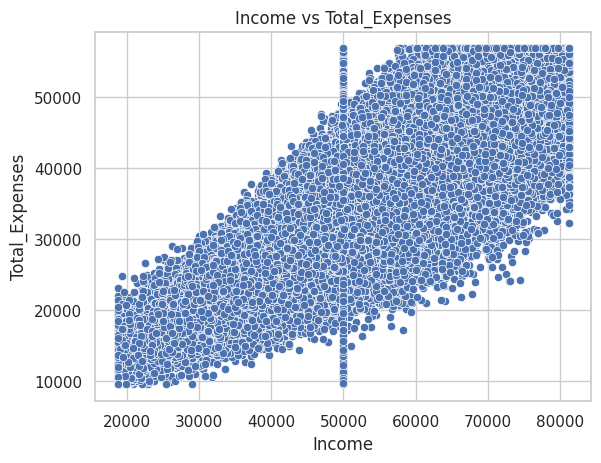

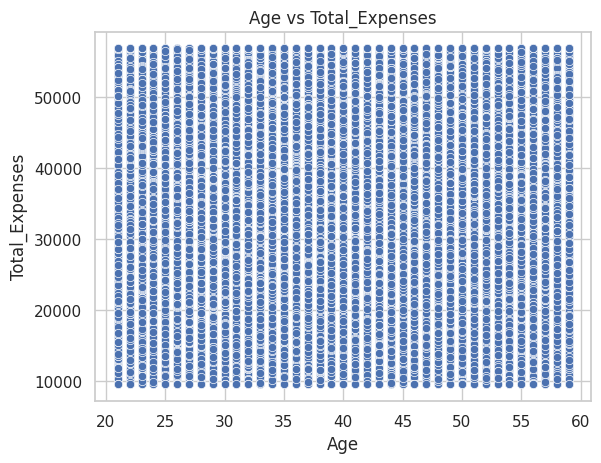

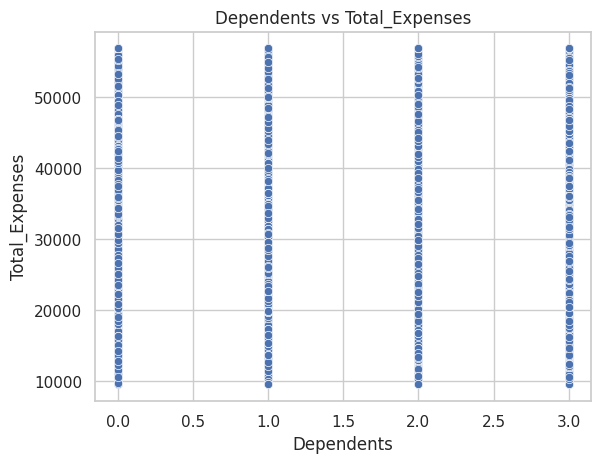

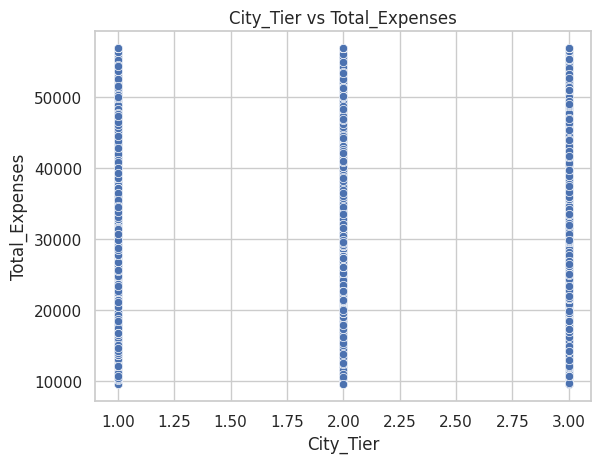

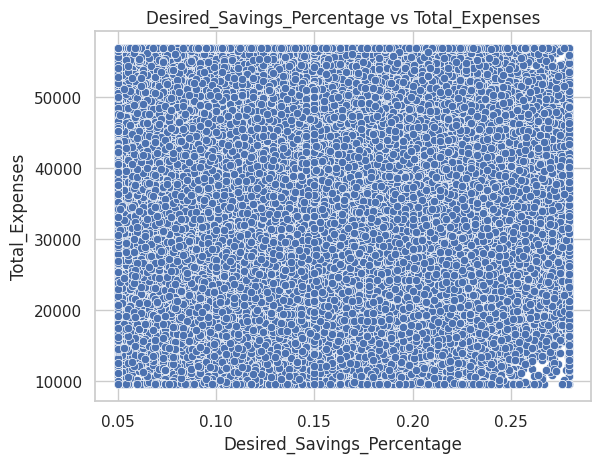

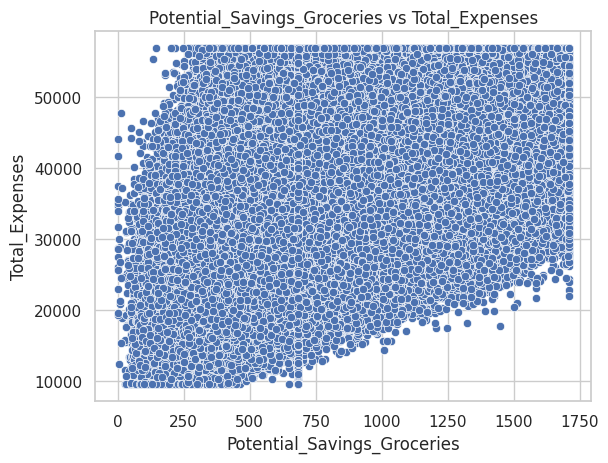

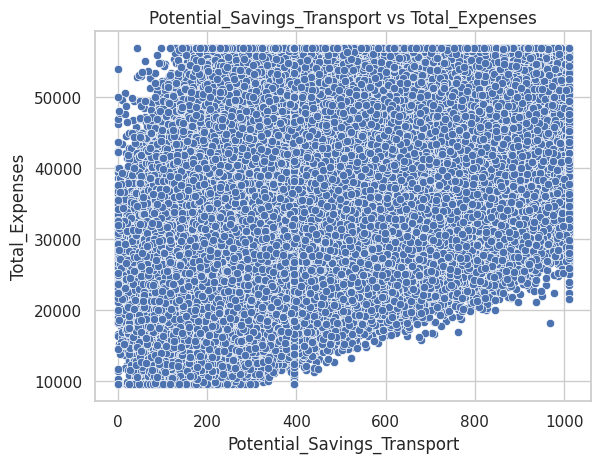

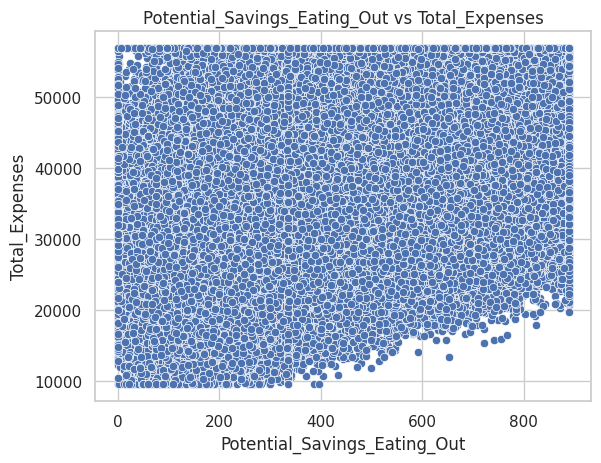

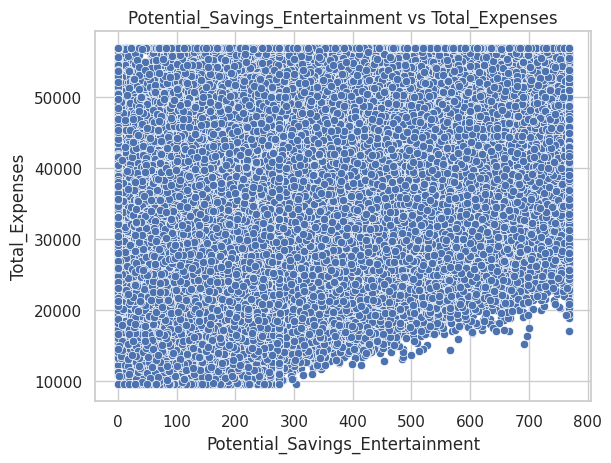

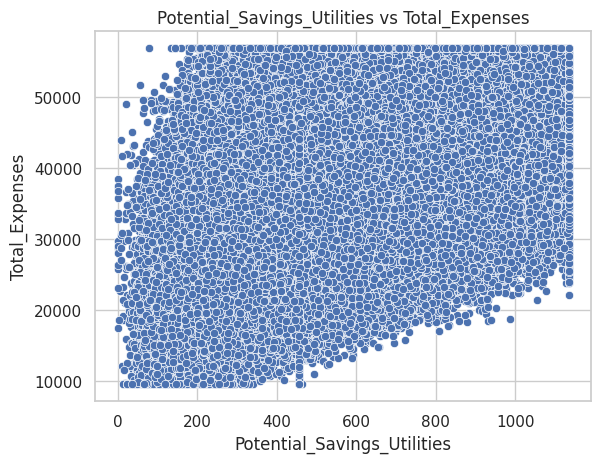

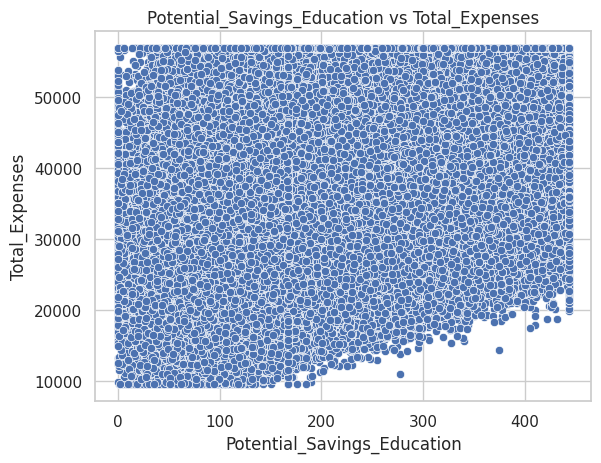

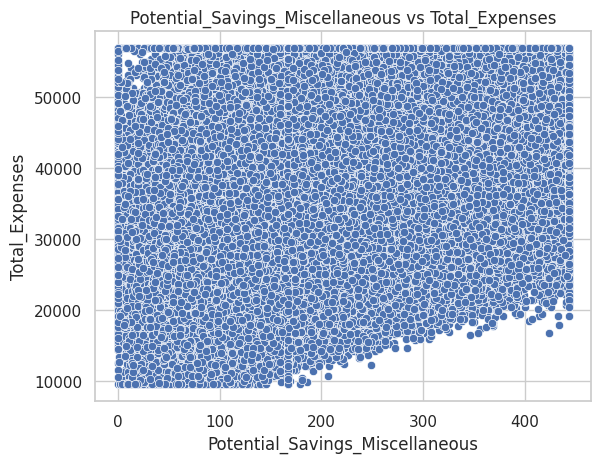

In [137]:
for col in df.select_dtypes(include=['int64', 'float64']).drop('Total_Expenses', axis=1).columns:
    plt.figure()
    sns.scatterplot(x=df[col], y=df['Total_Expenses'])
    plt.title(f"{col} vs Total_Expenses")
    plt.show()


## Categorical vs. Target

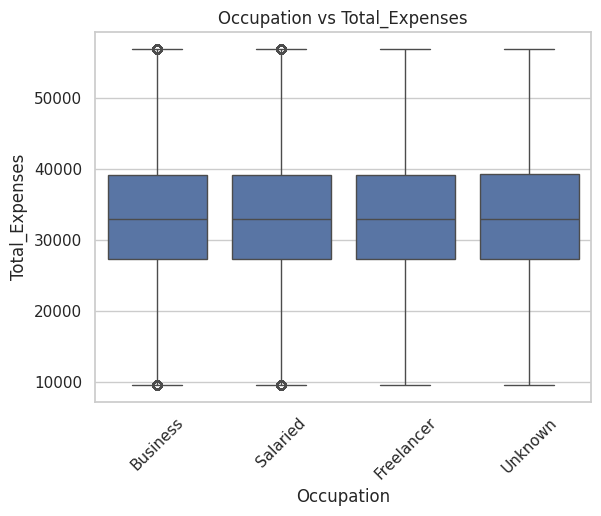

In [139]:
plt.figure()
sns.boxplot(x='Occupation', y='Total_Expenses', data=df)
plt.title("Occupation vs Total_Expenses")
plt.xticks(rotation=45)
plt.show()

# Correlation Heatmap

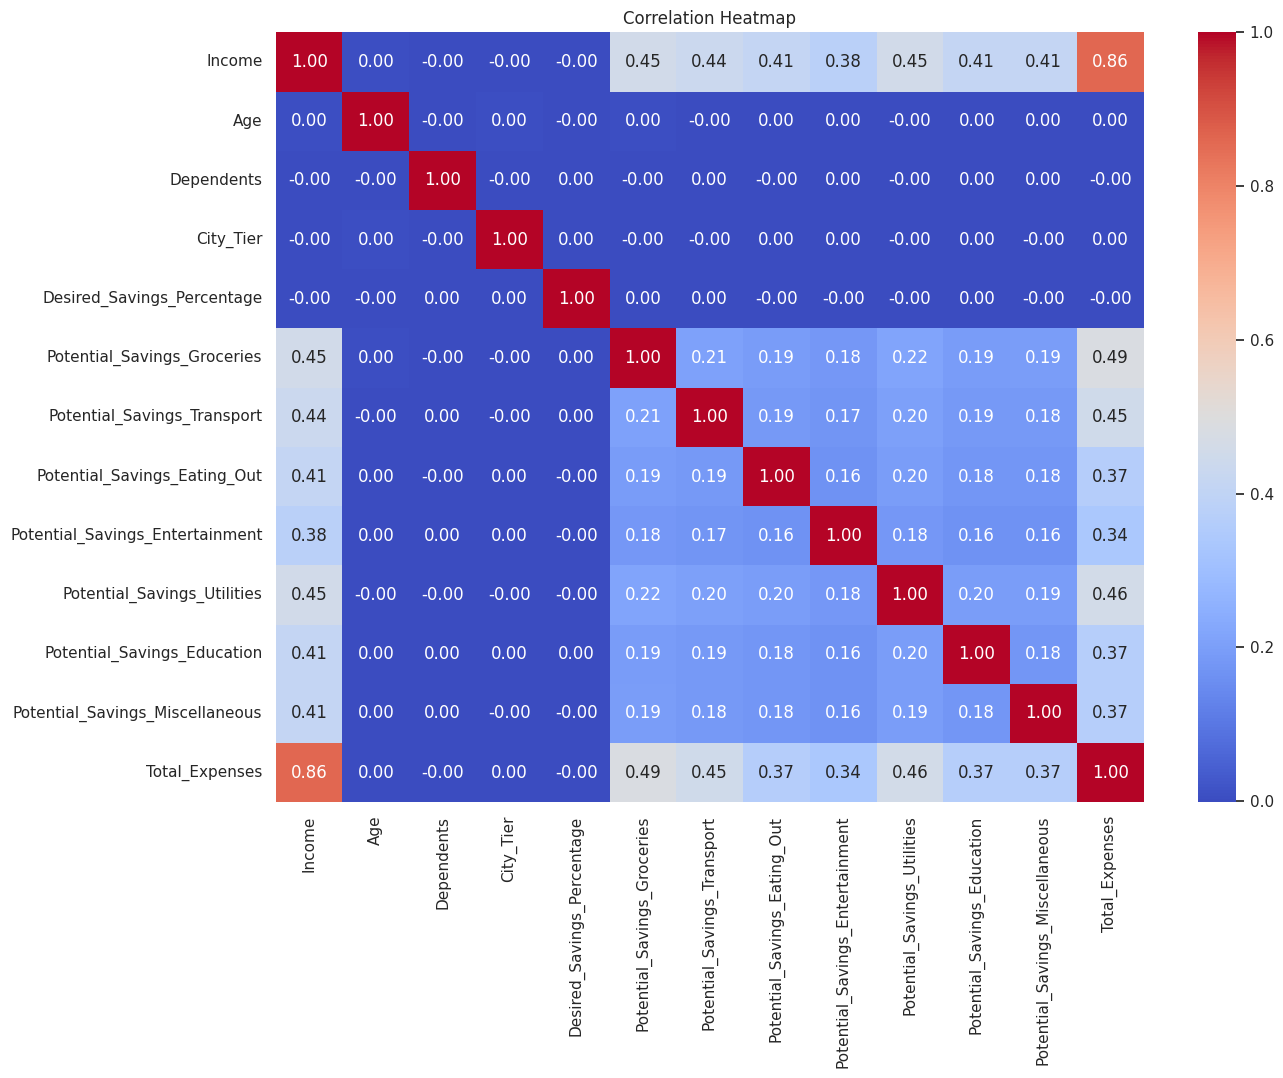

In [140]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Skewness & Outliers


📐 Skewness of numeric columns:
Potential_Savings_Entertainment    0.755853
Potential_Savings_Miscellaneous    0.747396
Potential_Savings_Eating_Out       0.742894
Potential_Savings_Education        0.740279
Potential_Savings_Transport        0.727872
Potential_Savings_Groceries        0.711569
Potential_Savings_Utilities        0.704218
City_Tier                          0.324271
Total_Expenses                     0.206572
Desired_Savings_Percentage         0.095955
Dependents                         0.040178
Age                                0.002100
Income                            -0.000623
dtype: float64


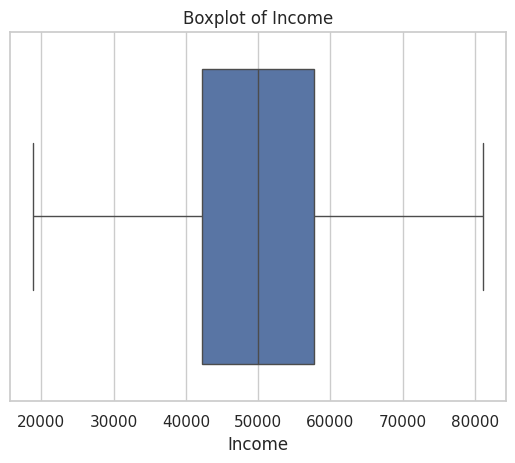

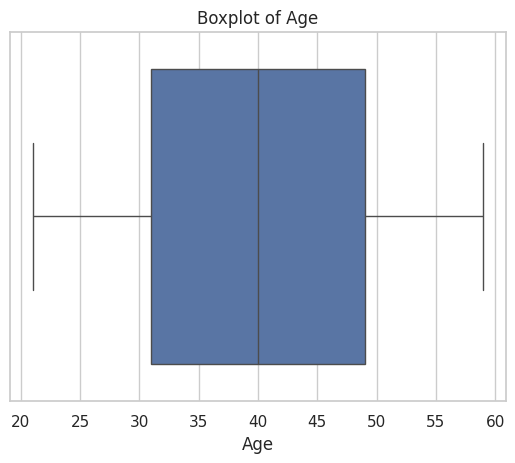

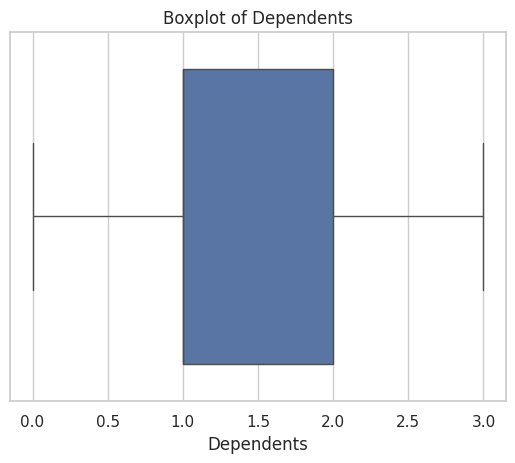

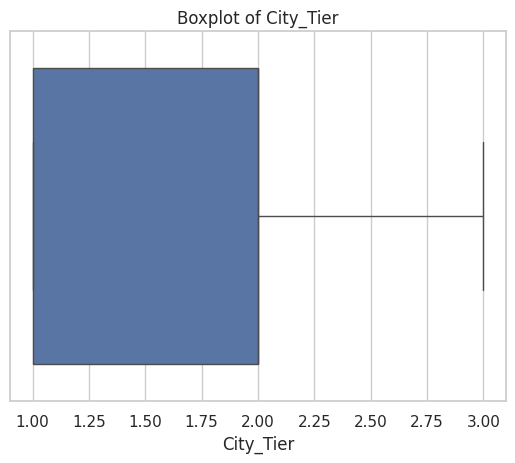

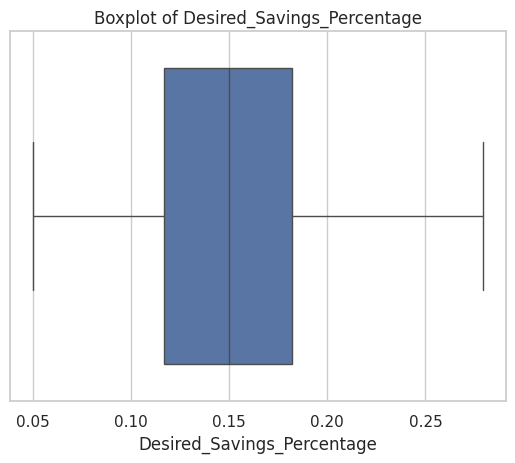

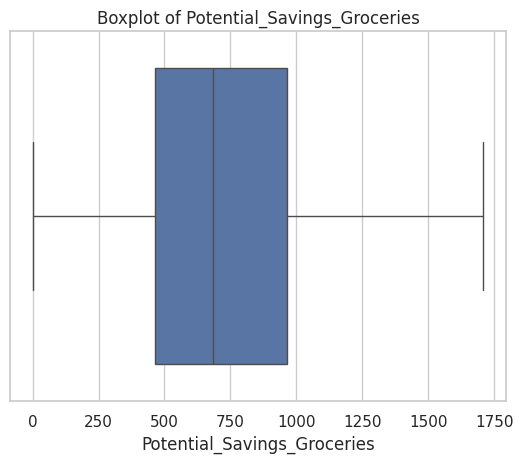

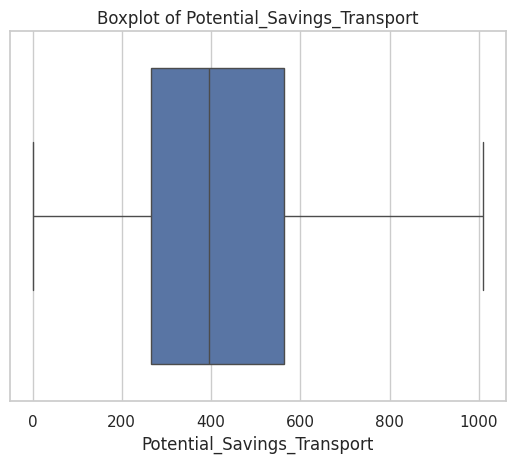

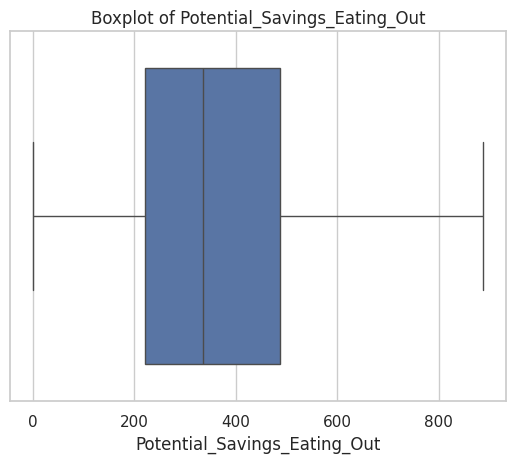

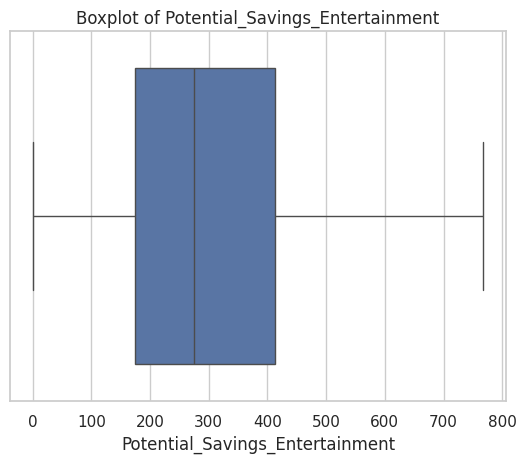

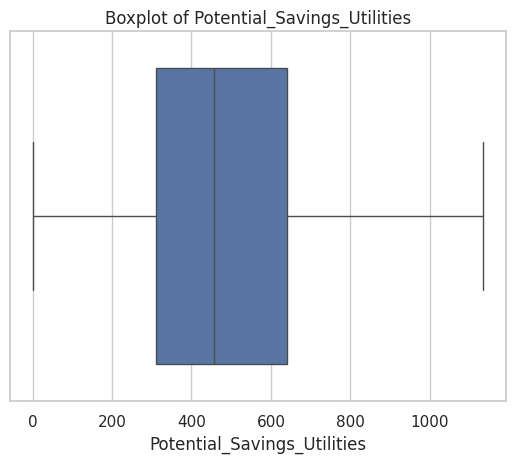

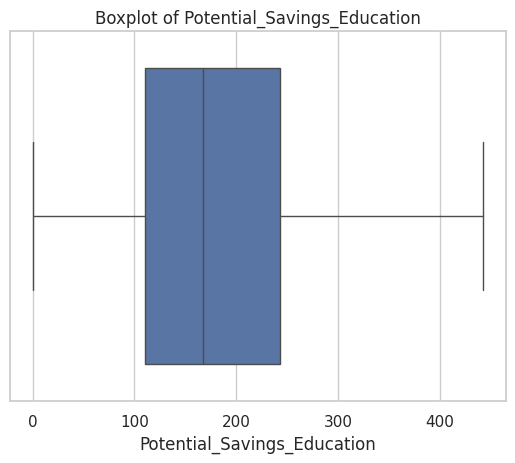

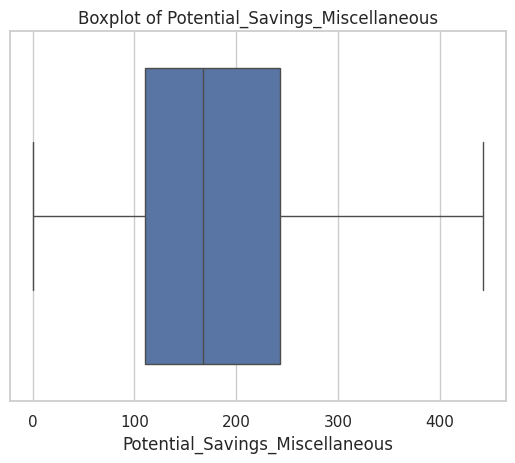

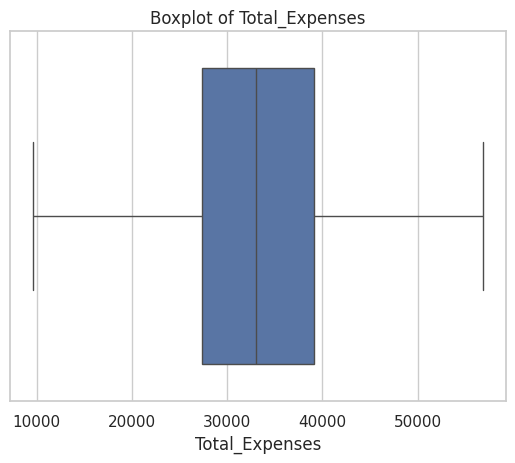

In [141]:
from scipy.stats import skew

print("\n📐 Skewness of numeric columns:")
print(df[num_cols].skew().sort_values(ascending=False))

# Boxplot to detect outliers
for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Step 04- Inferential Stats

## 1.T-Test or ANOVA

## Q: Is Total_Expenses significantly different across Occupations?

In [143]:
import scipy.stats as stats

# Get unique occupation groups
groups = [group["Total_Expenses"].dropna() for name, group in df.groupby("Occupation")]

# Perform one-way ANOVA
f_stat, p_val = stats.f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat:.2f}")
print(f"P-value: {p_val:.5f}")

if p_val < 0.05:
    print("✅ There is a statistically significant difference between occupations.")
else:
    print("❌ No significant difference between occupation groups.")


ANOVA F-statistic: 0.25
P-value: 0.86033
❌ No significant difference between occupation groups.


## 2. Confidence Interval for Mean Desired Savings %

In [144]:
import numpy as np
import scipy.stats as stats

mean = df["Desired_Savings_Percentage"].mean()
std_err = stats.sem(df["Desired_Savings_Percentage"].dropna())
ci = stats.t.interval(0.95, len(df["Desired_Savings_Percentage"])-1, loc=mean, scale=std_err)

print(f"📏 95% Confidence Interval for Desired Savings %: {ci[0]:.2f} to {ci[1]:.2f}")


📏 95% Confidence Interval for Desired Savings %: 0.15 to 0.15


## 3. Significance of Correlation

In [145]:
# Find correlation and p-value of numeric columns with  target
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    if col != "Total_Expenses":
        corr, p_val = stats.pearsonr(df[col], df["Total_Expenses"])
        print(f"{col} ↔ Total_Expenses → Corr = {corr:.2f}, P = {p_val:.5f}")

Income ↔ Total_Expenses → Corr = 0.86, P = 0.00000
Age ↔ Total_Expenses → Corr = 0.00, P = 0.12941
Dependents ↔ Total_Expenses → Corr = -0.00, P = 0.30264
City_Tier ↔ Total_Expenses → Corr = 0.00, P = 0.57810
Desired_Savings_Percentage ↔ Total_Expenses → Corr = -0.00, P = 0.40228
Potential_Savings_Groceries ↔ Total_Expenses → Corr = 0.49, P = 0.00000
Potential_Savings_Transport ↔ Total_Expenses → Corr = 0.45, P = 0.00000
Potential_Savings_Eating_Out ↔ Total_Expenses → Corr = 0.37, P = 0.00000
Potential_Savings_Entertainment ↔ Total_Expenses → Corr = 0.34, P = 0.00000
Potential_Savings_Utilities ↔ Total_Expenses → Corr = 0.46, P = 0.00000
Potential_Savings_Education ↔ Total_Expenses → Corr = 0.37, P = 0.00000
Potential_Savings_Miscellaneous ↔ Total_Expenses → Corr = 0.37, P = 0.00000


In [146]:
df.head()

Income  Age  Dependents Occupation  City_Tier  \
0  55960.570   46           1   Business          1   
1  48340.828   21           1   Salaried          1   
2  57772.262   25           0   Salaried          2   
3  68276.358   55           0   Salaried          1   
4  47190.160   48           1   Salaried          1   

   Desired_Savings_Percentage  Potential_Savings_Groceries  \
0                       0.188                     1278.636   
1                       0.083                      317.752   
2                       0.181                      909.169   
3                       0.069                      772.341   
4                       0.178                      720.857   

   Potential_Savings_Transport  Potential_Savings_Eating_Out  \
0                      306.490                       150.188   
1                      189.509                       391.868   
2                      448.338                       270.974   
3                      394.993                       557.189   
4                      689.550                       330.012   

   Potential_Savings_Entertainment  Potential_Savings_Utilities  \
0                          493.637                      120.427   
1                          189.861                      486.525   
2                          455.453                      301.929   
3                          584.195                     1035.831   
4                          116.537                      393.673   

   Potential_Savings_Education  Potential_Savings_Miscellaneous  \
0                      252.222                          115.619   
1                      288.871                          275.759   
2                       97.788                           95.327   
3                      166.961                          164.061   
4                      288.256                           53.678   

   Total_Expenses  
0       33417.791  
1       34916.376  
2       35726.037  
3       40503.980  
4       32799.478

# VISUAL 1: Boxplot of Occupation vs Desired_Savings_Percentage

/tmp/ipython-input-148-3732025152.py:10: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


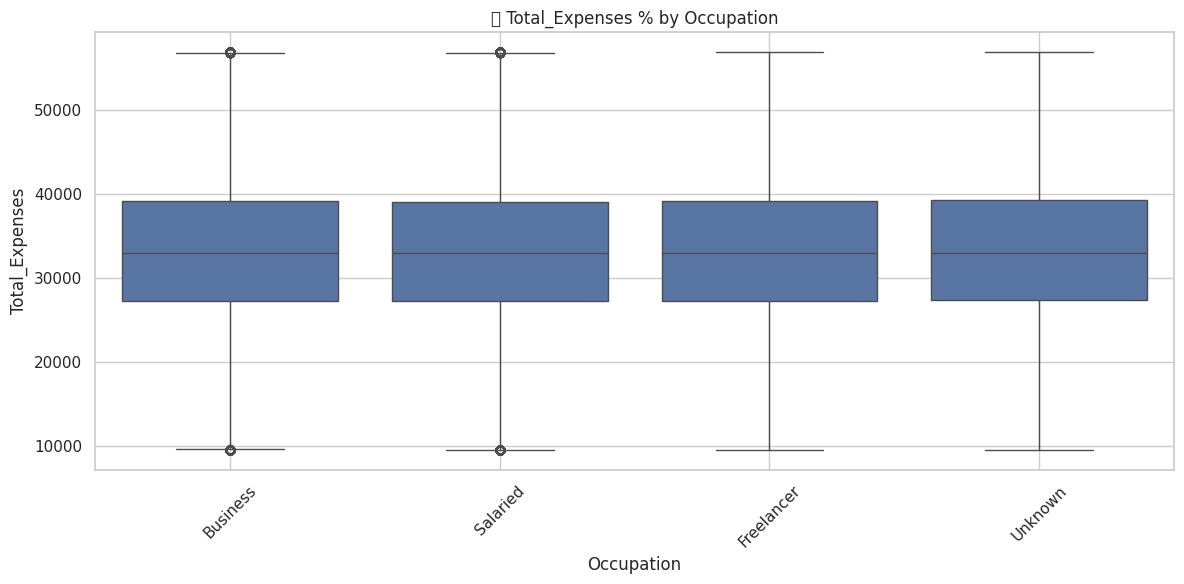

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='Occupation', y='Total_Expenses', data=df)
plt.title("📊 Total_Expenses % by Occupation")
plt.ylabel("Total_Expenses")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# VISUAL 2: Confidence Interval on Mean Desired Savings %

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


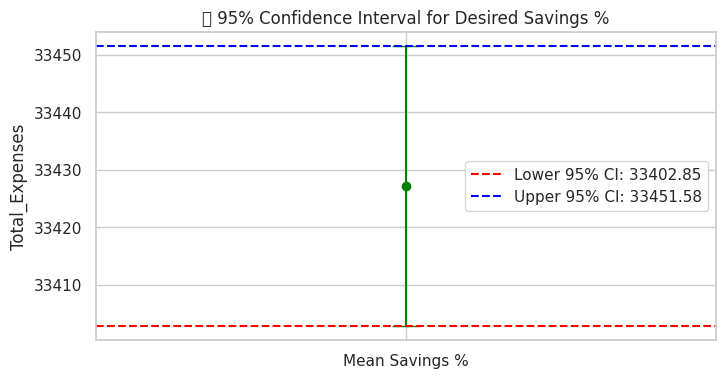

In [149]:
import numpy as np
import scipy.stats as stats

mean = df["Total_Expenses"].mean()
std_err = stats.sem(df["Total_Expenses"].dropna())
ci = stats.t.interval(0.95, len(df["Total_Expenses"])-1, loc=mean, scale=std_err)

# Visualize
plt.figure(figsize=(8, 4))
plt.errorbar(x=["Mean Savings %"], y=[mean], yerr=[mean - ci[0]], fmt='o', capsize=10, color='green')
plt.axhline(y=ci[0], color='red', linestyle='--', label=f"Lower 95% CI: {ci[0]:.2f}")
plt.axhline(y=ci[1], color='blue', linestyle='--', label=f"Upper 95% CI: {ci[1]:.2f}")
plt.title("📏 95% Confidence Interval for Desired Savings %")
plt.ylabel("Total_Expenses")
plt.legend()
plt.grid(True)
plt.show()

# VISUAL 3: Correlation Strength vs Significance (Bubble Plot)

/tmp/ipython-input-150-197002084.py:15: RuntimeWarning: divide by zero encountered in log10
  "-log10(P)": -np.log10(p_val)
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:2294: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:2294: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
/tmp/ipython-input-150-197002084.py:29: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


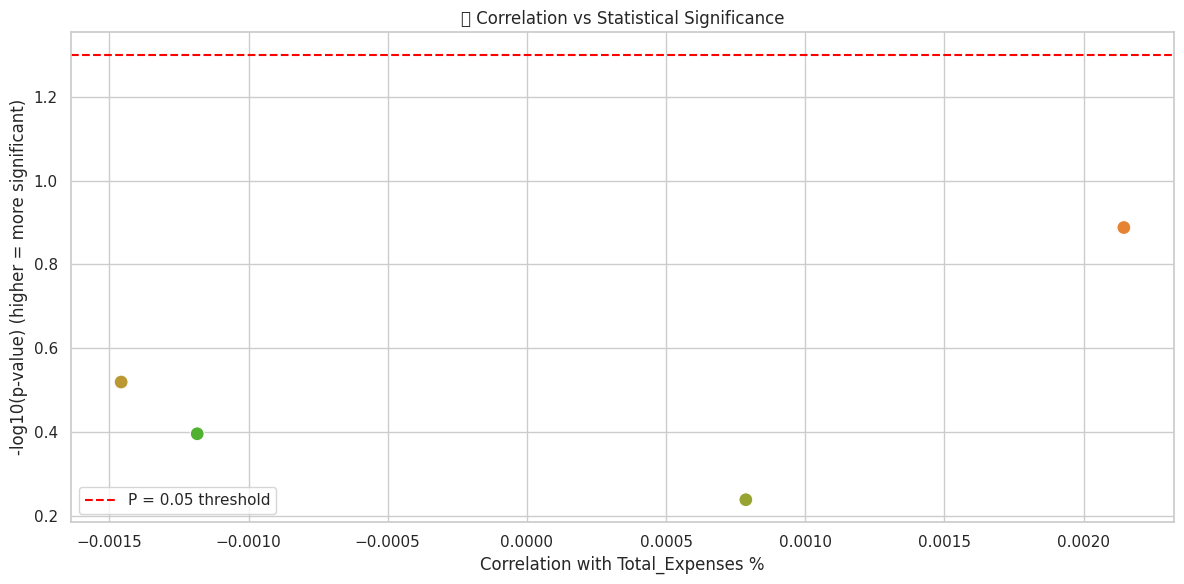

In [150]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

results = []

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    if col != "Total_Expenses":
        corr, p_val = stats.pearsonr(df[col], df["Total_Expenses"])
        results.append({
            "Feature": col,
            "Correlation": corr,
            "P_Value": p_val,
            "-log10(P)": -np.log10(p_val)
        })

result_df = pd.DataFrame(results)

# Bubble plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=result_df, x="Correlation", y="-log10(P)", size="-log10(P)", hue="Feature", legend=False, sizes=(100, 1000))
plt.axhline(-np.log10(0.05), color='red', linestyle='--', label="P = 0.05 threshold")
plt.title("🎯 Correlation vs Statistical Significance")
plt.xlabel("Correlation with Total_Expenses %")
plt.ylabel("-log10(p-value) (higher = more significant)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Step 05:- ML Models

# 01-Multi Catagorical Regression

In [151]:
df.head()

Income  Age  Dependents Occupation  City_Tier  \
0  55960.570   46           1   Business          1   
1  48340.828   21           1   Salaried          1   
2  57772.262   25           0   Salaried          2   
3  68276.358   55           0   Salaried          1   
4  47190.160   48           1   Salaried          1   

   Desired_Savings_Percentage  Potential_Savings_Groceries  \
0                       0.188                     1278.636   
1                       0.083                      317.752   
2                       0.181                      909.169   
3                       0.069                      772.341   
4                       0.178                      720.857   

   Potential_Savings_Transport  Potential_Savings_Eating_Out  \
0                      306.490                       150.188   
1                      189.509                       391.868   
2                      448.338                       270.974   
3                      394.993                       557.189   
4                      689.550                       330.012   

   Potential_Savings_Entertainment  Potential_Savings_Utilities  \
0                          493.637                      120.427   
1                          189.861                      486.525   
2                          455.453                      301.929   
3                          584.195                     1035.831   
4                          116.537                      393.673   

   Potential_Savings_Education  Potential_Savings_Miscellaneous  \
0                      252.222                          115.619   
1                      288.871                          275.759   
2                       97.788                           95.327   
3                      166.961                          164.061   
4                      288.256                           53.678   

   Total_Expenses  
0       33417.791  
1       34916.376  
2       35726.037  
3       40503.980  
4       32799.478

In [152]:
Occupation_dummy = pd.get_dummies(df['Occupation'], prefix='Occ', drop_first=True).astype(int)
df = df.drop('Occupation', axis=1)
df = pd.concat([df, Occupation_dummy], axis=1)


In [153]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [154]:
# Step 2: Train-test split
x_train, x_test, y_train, y_test = train_test_split(df.drop('Total_Expenses', axis=1), df['Total_Expenses'], test_size=0.2, random_state=20)

## One Hot Encoding

In [155]:
# Convert all to float64 to avoid object dtype issues
x_train = x_train.astype('float64')
y_train = y_train.astype('float64')
x_test = x_test.astype('float64')
y_test = y_test.astype('float64')

In [156]:
print(x_train.dtypes)
print(y_train.dtypes)

Income                             float64
Age                                float64
Dependents                         float64
City_Tier                          float64
Desired_Savings_Percentage         float64
Potential_Savings_Groceries        float64
Potential_Savings_Transport        float64
Potential_Savings_Eating_Out       float64
Potential_Savings_Entertainment    float64
Potential_Savings_Utilities        float64
Potential_Savings_Education        float64
Potential_Savings_Miscellaneous    float64
Occ_Freelancer                     float64
Occ_Salaried                       float64
Occ_Unknown                        float64
dtype: object
float64


In [163]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict on training data
y_train_pred_ols = mod1.predict(x_train)

# Predict on test data (already done as y_pred)
y_test_pred_ols = y_pred  # alias for clarity

# Calculate RMSE and R²
rmse_train_ols = np.sqrt(mean_squared_error(y_train, y_train_pred_ols))
rmse_test_ols = np.sqrt(mean_squared_error(y_test, y_test_pred_ols))

r2_train_ols = r2_score(y_train, y_train_pred_ols)
r2_test_ols = r2_score(y_test, y_test_pred_ols)

# Print results
print("\n📈 OLS Model Performance:")
print(f"🔹 Train RMSE: {rmse_train_ols:.2f}")
print(f"🔹 Test  RMSE: {rmse_test_ols:.2f}")
print(f"🔹 Train R²:  {r2_train_ols:.4f}")
print(f"🔹 Test  R²:  {r2_test_ols:.4f}")



📈 OLS Model Performance:
🔹 Train RMSE: 4249.18
🔹 Test  RMSE: 4267.49
🔹 Train R²:  0.7660
🔹 Test  R²:  0.7658


In [165]:
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:         Total_Expenses   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                 8.729e+04
Date:                Sun, 29 Jun 2025   Prob (F-statistic):               0.00
Time:                        14:34:38   Log-Likelihood:            -3.9094e+06
No. Observations:              400000   AIC:                         7.819e+06
Df Residuals:                  399984   BIC:                         7.819e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Income    

In [158]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# ✅ RMSE (manually by taking square root)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# ✅ R² Score
r2 = r2_score(y_test, y_pred)

print(f"📊 Prediction Evaluation:")
print(f"🔹 RMSE: {rmse:.2f}")
print(f"🔹 R² Score: {r2:.2f}")


📊 Prediction Evaluation:
🔹 RMSE: 4267.49
🔹 R² Score: 0.77


# 02-DECISION TREE

In [159]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Define model and hyperparameter grid
dtr = DecisionTreeRegressor()
params = {
    'criterion': ['squared_error'],
    'max_depth': [7,8,9,10],
    'min_samples_split': [2],
    'min_samples_leaf': [2]
}

# Grid search with R² as scoring
grid = GridSearchCV(dtr, param_grid=params, cv=5, scoring='r2', n_jobs=-1)
grid.fit(x_train, y_train)

# Best model
best_dtr = grid.best_estimator_
y_train_pred = best_dtr.predict(x_train)
y_test_pred = best_dtr.predict(x_test)

# Best Paramaters
print("Best Params:", grid.best_params_)

# Evaluation
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))

Best Params: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Train R²: 0.774870686234094
Test R²: 0.765260562007622


# 03-RANDOM FOREST

In [160]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

RandomForest = RandomForestRegressor()

param_grid = {
    'n_estimators': [50],
    'criterion': ['squared_error'],
    'max_depth': [10],
    'min_samples_leaf': [2],
    'min_samples_split': [2],
}

grid_search = GridSearchCV(RandomForest, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)

# Train with best params
rfr_best = RandomForestRegressor(**grid_search.best_params_)
rfr_best.fit(x_train, y_train)

# Print R² scores
print("Train R²:", rfr_best.score(x_train, y_train))
print("Test R²:", rfr_best.score(x_test, y_test))

Best Parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Train R²: 0.7816125092793311
Test R²: 0.7735079719324509


# 04-GRADIENT BOOSTING REGRESSOR





In [161]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Create the model
gbr = GradientBoostingRegressor(random_state=42)

# 2. Fit the model on training data
gbr.fit(x_train, y_train)

# 3. Predict on test data
y_pred_gbr = gbr.predict(x_test)

# 4. Evaluate performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2 = r2_score(y_test, y_pred_gbr)

print("📈 Gradient Boosting Regressor Results:")
print(f"🔹 RMSE: {rmse:.2f}")
print(f"🔹 R² Score: {r2:.2f}")


📈 Gradient Boosting Regressor Results:
🔹 RMSE: 4189.51
🔹 R² Score: 0.77


In [162]:
# 5. Predict on training data
y_train_pred = gbr.predict(x_train)

# 6. R² scores for train and test
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_pred_gbr)

print("\n📊 R² Scores:")
print(f"🔹 Train R²: {r2_train:.4f}")
print(f"🔹 Test  R²: {r2_test:.4f}")



📊 R² Scores:
🔹 Train R²: 0.7752
🔹 Test  R²: 0.7742


# End!!!